In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Q1. Import all the required packages and read the dataframe into a variable called bank_df (2 marks)

In [107]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  # this is to ignore the warnings that we are getting
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler  # this import statement is for scalling the data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # this is for splitting the data int train and test
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix  # used for confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error # to find rmse value 

## Reading the dataset

In [3]:
bank_df=pd.read_csv("InfyBank_Personal_Loan_Modelling.csv")
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Q2. Explore the dataset  and do the neccessary preprocessing for the attributes and state your insights (8 marks)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
## for this we can infer that all the data in thge dataframe are of numeric type 

In [6]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
bank_df["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

## THERE ARE SOME NEGATIVE VALUES IN THE EXPERIENCE COLUMN EXPERIENCE CANNOT BE IN NEGATIVE SO I AM GOING TO REPLACE IT BY NULL VALUES

In [8]:
bank_df["Experience"].replace(-1,np.nan,inplace=True)

In [9]:
bank_df["Experience"].replace(-2,np.nan,inplace=True)

In [10]:
bank_df["Experience"].replace(-3,np.nan,inplace=True)

## There is no null values or negative values in other columns except experience column

In [12]:
bank_df.isna().sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [ ]:
## there are 52 null values in experience since it differs for every person we cannot replace it by mean or median 
# so drop it 

In [14]:
bank_df.dropna(inplace=True)

In [155]:
## finding the shape of the data after removing the null values

In [15]:
bank_df.shape

(4948, 14)

In [16]:
# TO FIND WHETHER THERE ARE OUTLIERS --> BOX PLOT 

ID


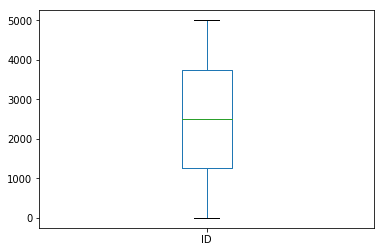

Age


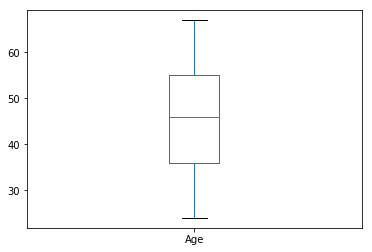

Experience


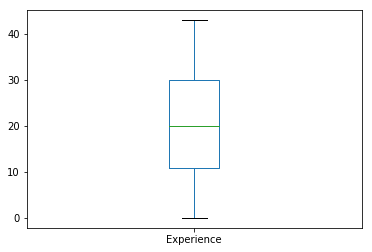

Income


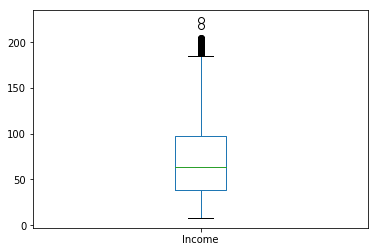

ZIP Code


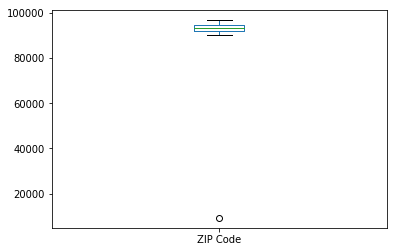

Family


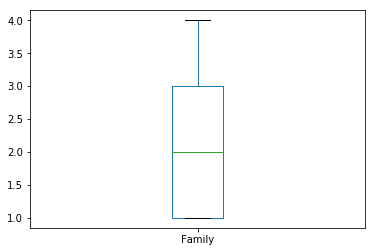

CCAvg


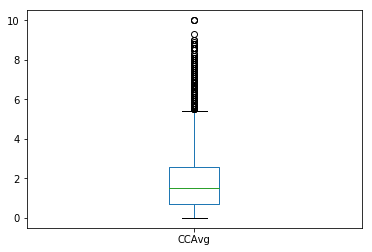

Education


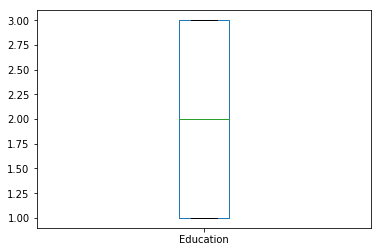

Mortgage


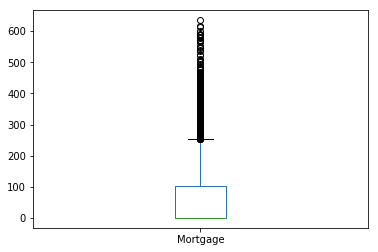

Personal Loan


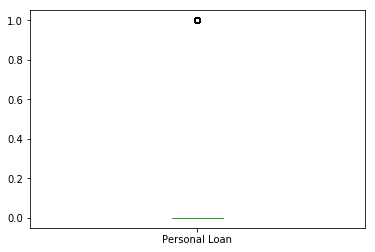

Securities Account


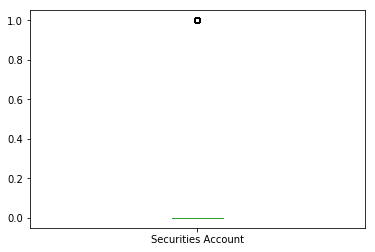

CD Account


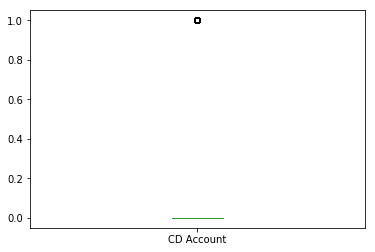

Online


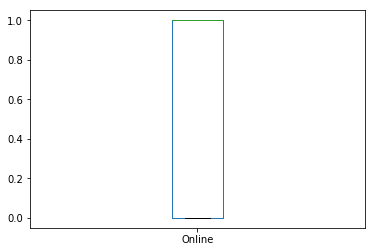

CreditCard


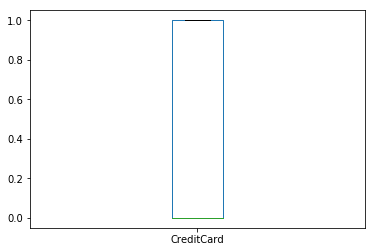

In [17]:
for i in bank_df.columns:
    print(i)
    bank_df[i].plot(kind="box")
    plt.show()

In [21]:
## since income,CCAvg and Mortgage differs for each and every person it is not said to be outlier
## sice personal loan and securities account are like yes or no we cannot remove outlier



In [22]:
## SO I AM NOT GOING TO REMOVE OUTLIERS 

## TO find the distribution of data

ID


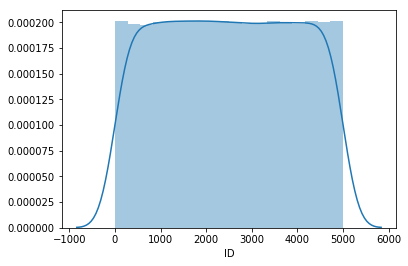

Age


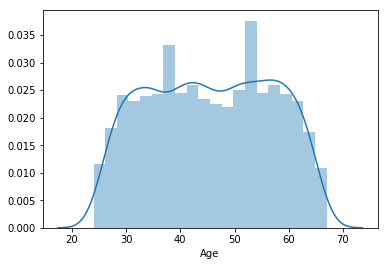

Experience


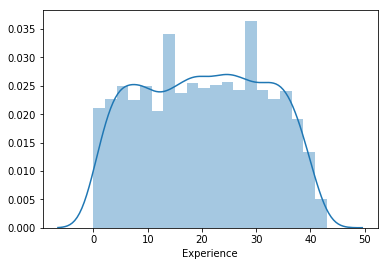

Income


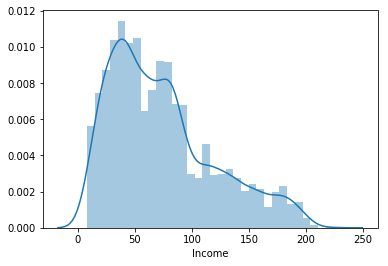

ZIP Code


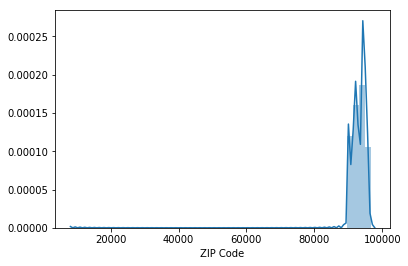

Family


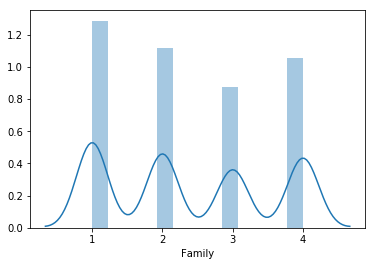

CCAvg


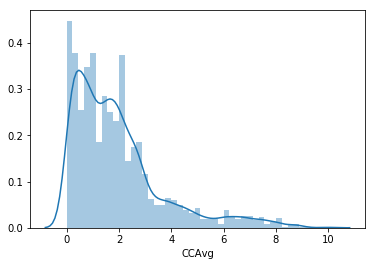

Education


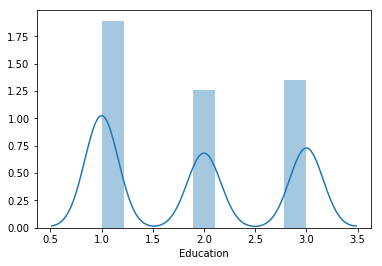

Mortgage


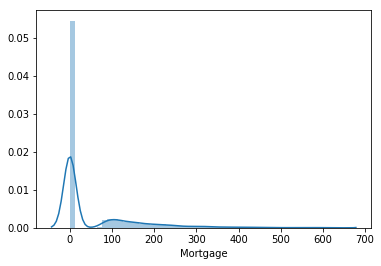

Personal Loan


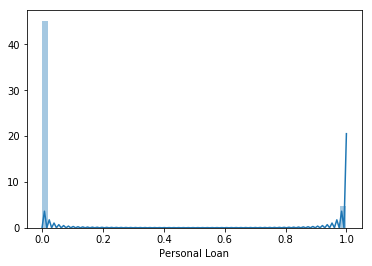

Securities Account


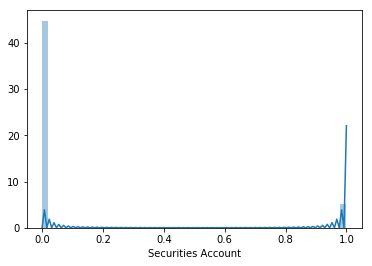

CD Account


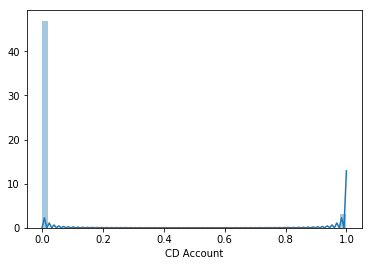

Online


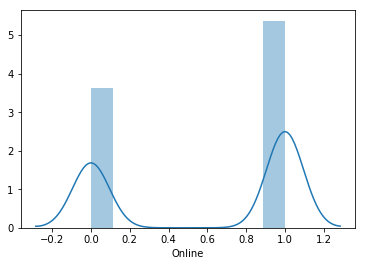

CreditCard


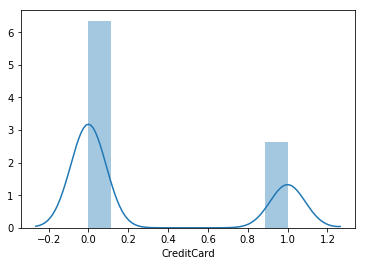

In [23]:
for i in bank_df.columns:
    print(i)
    sb.distplot(bank_df[i])
    plt.show()

In [24]:
## FROM THIS WE CAN INFER THAT THE ENTIRE DATASET  IS NOT NORMALLY DISTRIBUTED

In [26]:
bank_df.skew().sum()

1.8431882826827235

In [28]:
## FROM THIS WE CAN INFER THAT THE DATA IS NOT BALANCED AND IT IS RIGHT SKEWED  SINCE IT IS  A POSITIVELY VALUE

## Target variable

In [30]:
#target variable ->Personal Loan

a=bank_df["Personal Loan"].value_counts()

In [31]:
a

0    4468
1     480
Name: Personal Loan, dtype: int64

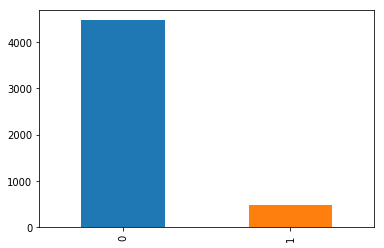

In [32]:
a.plot(kind="bar")
plt.show()

In [33]:
## from this we can infer that the data is biased towards 0

In [35]:
a=bank_df.loc[:,['Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account']]

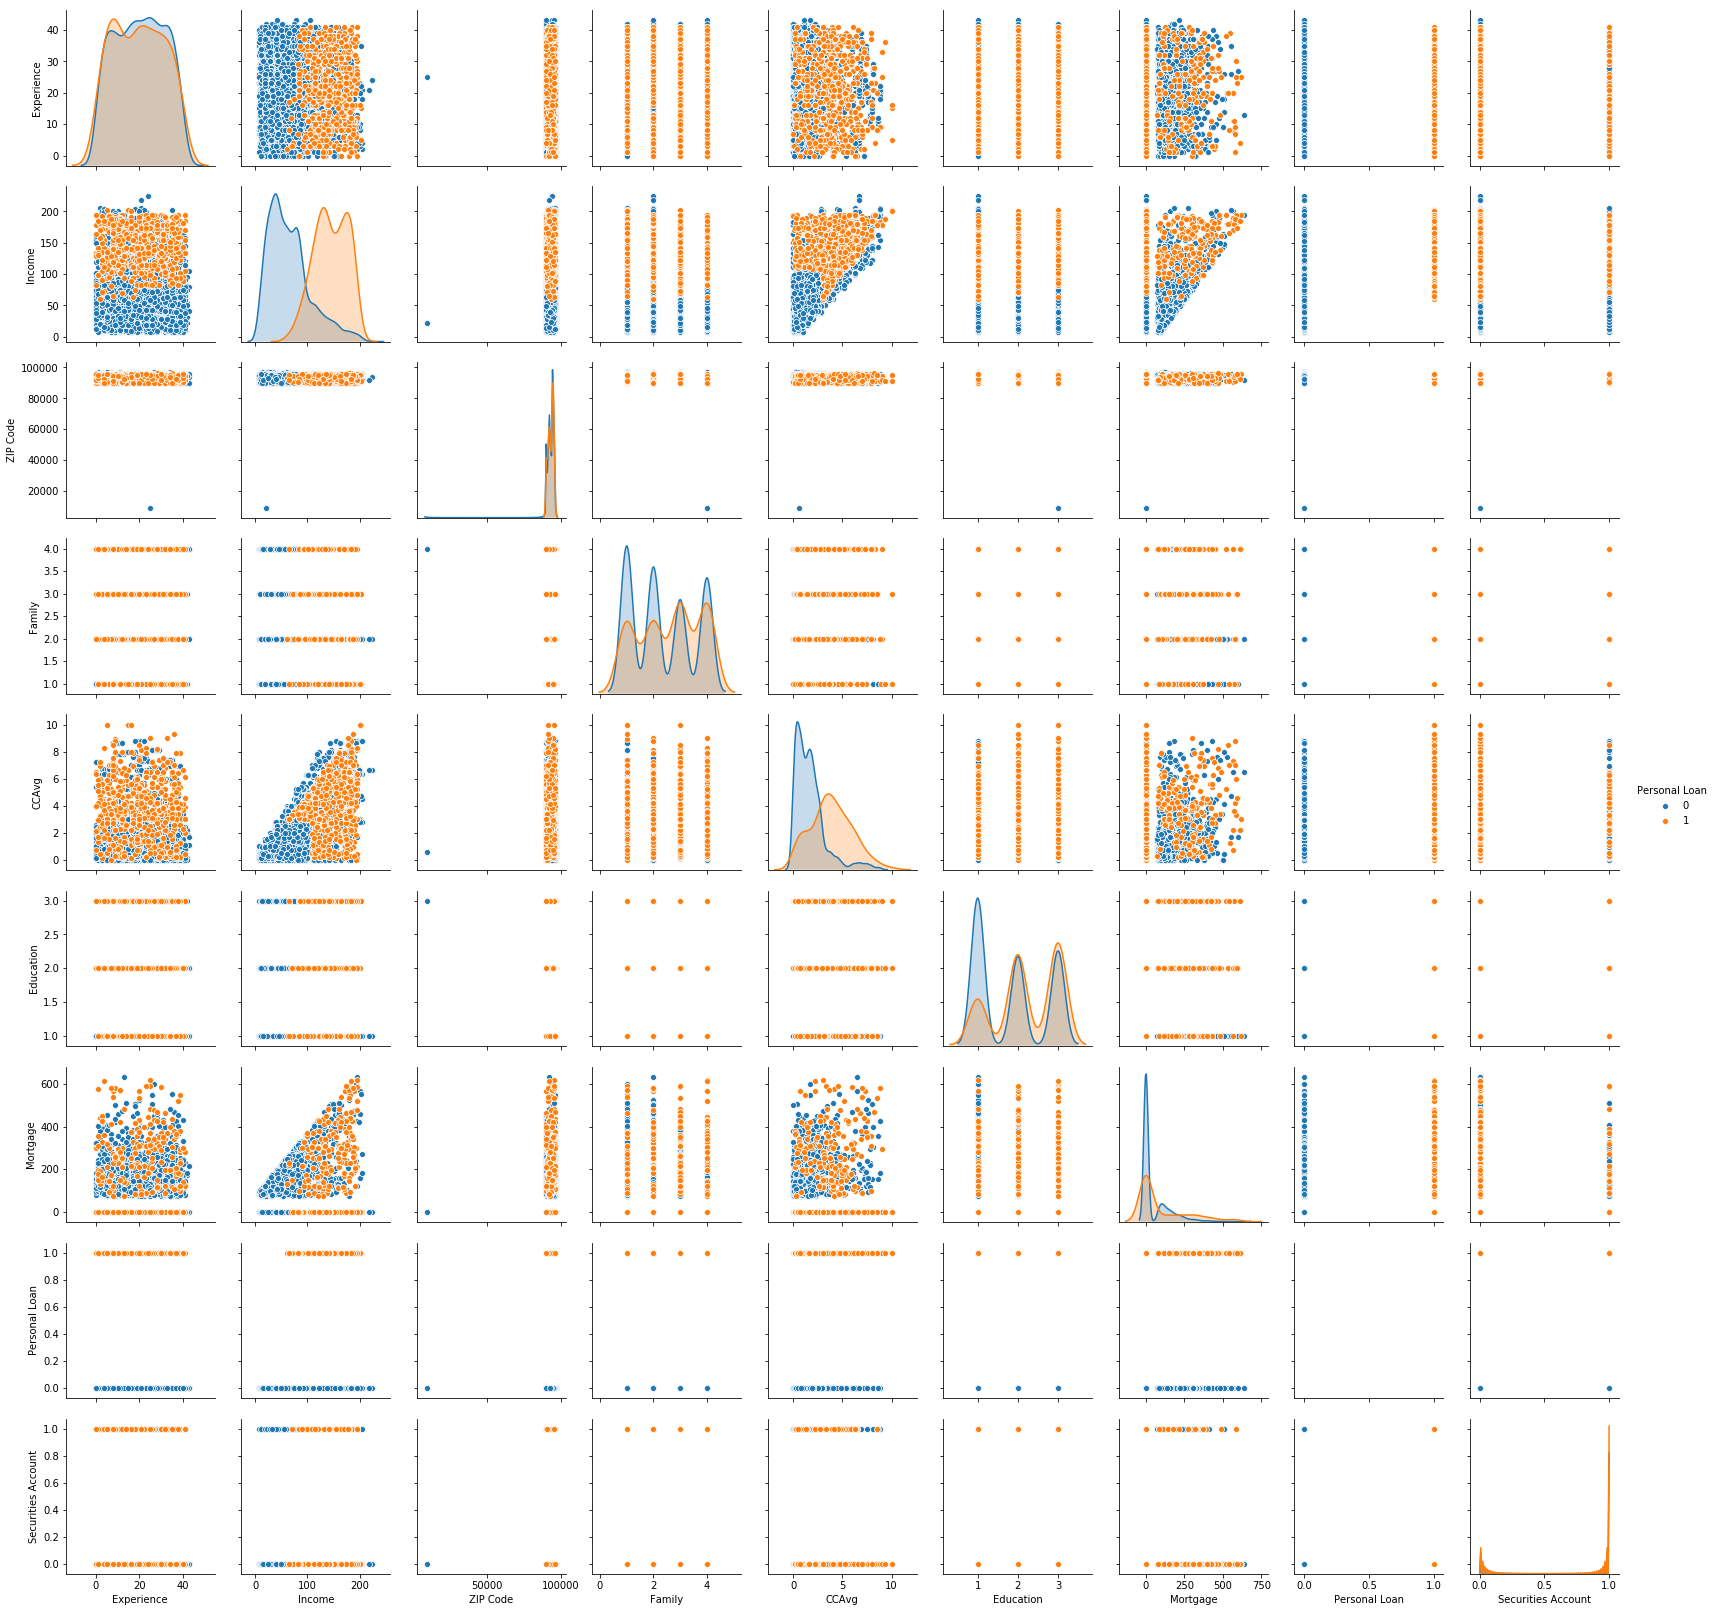

In [36]:
sb.pairplot(a,hue="Personal Loan")
plt.show()

In [37]:
## ferom tyhis we can infer that from mortgage and income we can seggregate whether he want loan or not 
# and from income and experience also we can slightly seggregate

## NORMALIZING THE DATASET 

In [38]:
scaler = MinMaxScaler()

In [39]:
norm_bank_df= pd.DataFrame(scaler.fit_transform(bank_df))
norm_bank_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0000,0.023256,0.023256,0.189815,0.936527,1.000000,0.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0002,0.488372,0.441860,0.120370,0.924872,0.666667,0.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0004,0.348837,0.348837,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
norm_bank_df.columns=bank_df.columns
norm_bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.0000,0.023256,0.023256,0.189815,0.936527,1.000000,0.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0002,0.488372,0.441860,0.120370,0.924872,0.666667,0.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0004,0.348837,0.348837,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0006,0.255814,0.209302,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0008,0.255814,0.186047,0.171296,0.939080,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
#since some of the data are having less range and others are having higher range so scaling the entire dataset 

# Q4. Separate the independent attributes and store them in X array. Store the target column into Y array (5 marks)

In [43]:
feature=norm_bank_df.loc[:,['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
dependent=norm_bank_df.loc[:,['Personal Loan']]


In [ ]:
## Personal loan is trhe target variable

# Q5. Apply Principal Component Analysis on the explored attributes and select the features that are explaining 95% variance of the data distribution and show the feature importance. (10 marks)

In [59]:


pca=PCA(n_components=8)
bank_df_train=pca.fit_transform(feature)

In [60]:

explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.1960404 , 0.17065226, 0.14788264, 0.11930595, 0.10718475,
       0.08318816, 0.06663834, 0.05034378])

In [61]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1960404 , 0.36669266, 0.5145753 , 0.63388125, 0.741066  ,
       0.82425416, 0.89089249, 0.94123627])

In [62]:
## the above code is to find the cumulative sum of the variance that is explained

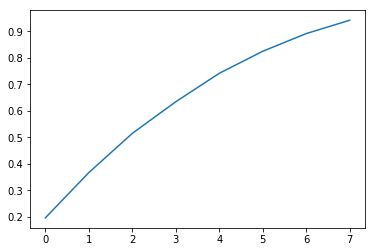

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [56]:
## to show the explained variance vizually 

# Q6. Create the training and test data set in the ratio of 70:30 respectively and set the random_state as 42. (5 marks)

In [64]:
bank_df_train,bank_df_test,label_train,label_test=train_test_split(bank_df_train,dependent,test_size=0.30,random_state=42)
display(bank_df_train.shape)
display(bank_df_test.shape)


(3463, 8)

(1485, 8)

In [65]:
# spliting the data into training and testing samples in the ratio of 70:30

In [66]:
# keeping the random state as 42    in the bank_df_train and bank_df_test we will be getting the features which are 
# selected from the principle component analysis

# Q6. Build a Logistic Regression Model to predict the personal loan affinity ( 15 marks)

In [67]:
mod=LogisticRegression()
mod.fit(bank_df_train,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
print("train accuracy")
display(mod.score(bank_df_train,label_train))


print("test accuracy")
display(mod.score(bank_df_test,label_test))

train accuracy


0.9408027721628646

test accuracy


0.9508417508417508

In [69]:
lr=mod.score(bank_df_test,label_test)

In [ ]:
## from logistic model test accuracy is 95.08%(r2 score)

## finding the RMSE value

In [135]:
test_prediction=mod.predict(bank_df_test)

In [136]:
rmse_lr=mean_squared_error(label_test,test_prediction)**0.5

In [137]:
rmse_lr

0.22171659648805986

# Q7. Print the confusion matrix and state your insights about the performance of the model (10 marks)

In [72]:
train_prediction=mod.predict(bank_df_train)
test_prediction=mod.predict(bank_df_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [ ]:
### confusion_matrix for training samples

In [73]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)


,0.0,1.0
0.0,3069,43
1.0,162,189


In [74]:
##### confusion_matrix for testing samples

In [75]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,1344,12
1.0,61,68


In [76]:
## from this we can infer that out of 1485 the model is able to predict 1412 values correctly 

##TP =1344 FP=68 
## FP 61 FN 12

## Classification report 

In [77]:
print("classification_report of train samples")
print(classification_report(label_train,train_prediction))

classification_report of train samples
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      3112
         1.0       0.81      0.54      0.65       351

   micro avg       0.94      0.94      0.94      3463
   macro avg       0.88      0.76      0.81      3463
weighted avg       0.94      0.94      0.94      3463



In [78]:
print("classification_report of test samples")
print(classification_report(label_test,test_prediction))

classification_report of test samples
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1356
         1.0       0.85      0.53      0.65       129

   micro avg       0.95      0.95      0.95      1485
   macro avg       0.90      0.76      0.81      1485
weighted avg       0.95      0.95      0.95      1485



In [156]:
## FROM THE CLASSIFICATION REPORT WE CAN INFER THE PRECISION RECALL F1 SCORE

# Q8. Build a k Nearest Neigbours Classifier Model to predict the personal loan affinity (Provide the k Value as 3) (15 marks)

In [79]:
kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [80]:
kmodel.fit(bank_df_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [81]:
print("train accuracy")
display(kmodel.score(bank_df_train,label_train))

print("test accuracy")
display(kmodel.score(bank_df_test,label_test))

train accuracy


0.9714120704591395

test accuracy


0.9595959595959596

In [91]:
knn=kmodel.score(bank_df_test,label_test)

In [82]:
## from knearestneighbor model test accuracy is 95.95%(r2 score)

In [ ]:
#PARAMETER DESCRIPTION
#n_neighbors-->Number of neighbors to use
# METRIC -->the distance metric to use for the tree.  The default metric is  minkowski


In [ ]:
#knearestneighbor ->if it is found that two
  # neighbors, neighbor `k+1` and `k`, have identical distances
  # but different labels, the results will depend on the ordering of the
  # training data.


## Finding the RMSE value 

In [138]:
test_prediction=kmodel.predict(bank_df_test)

In [139]:
rmse_knn=mean_squared_error(label_test,test_prediction)**0.5

In [140]:
rmse_knn

0.20100756305184242

# Q9. Print the confusion matrix and state your insights about the performance of the model (10 marks)

In [85]:
train_prediction=kmodel.predict(bank_df_train)
test_prediction=kmodel.predict(bank_df_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [88]:
### confusion_matrix for training samples

In [86]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,3102,10
1.0,89,262


In [89]:
### confusion_matrix for testing samples

In [87]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,1351,5
1.0,55,74


In [90]:
## from this we can infer that out of 1485 the model is able to predict 1425 values correctly 

##TP =1351 FP=74 
## FP 55 FN 5

## from this we can infer that  comparing to logistic regression we are able to correctly predict using knearest neighbor model 

## classification report

In [92]:
print("classification_report of train samples")
print(classification_report(label_train,train_prediction))

classification_report of train samples
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3112
         1.0       0.96      0.75      0.84       351

   micro avg       0.97      0.97      0.97      3463
   macro avg       0.97      0.87      0.91      3463
weighted avg       0.97      0.97      0.97      3463



In [93]:
print("classification_report of test samples")
print(classification_report(label_test,test_prediction))

classification_report of test samples
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1356
         1.0       0.94      0.57      0.71       129

   micro avg       0.96      0.96      0.96      1485
   macro avg       0.95      0.78      0.84      1485
weighted avg       0.96      0.96      0.96      1485



In [157]:
## FROM THE CLASSIFICATION REPORT WE CAN INFER THE PRECISION RECALL F1 SCORE

# Q10. Apply Random Forest Classifier Method and keep the number of estimators as 10 and check if there is any improvement in the model performance. State your insights (10 marks)

## using n_estimators,min_sample_split,min_impurity_decrease

In [94]:
rmodel=RandomForestClassifier(n_estimators=10,min_samples_split=20,min_impurity_decrease=0.1)


In [95]:
rmodel.fit(bank_df_train,label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
print("train accuracy")
display(rmodel.score(bank_df_train,label_train))

print("test accuracy")
display(rmodel.score(bank_df_test,label_test))

train accuracy


0.8986427952642217

test accuracy


0.9131313131313131

In [106]:
rfc=rmodel.score(bank_df_test,label_test)

In [97]:
## from this we can infer that using n_estimators,min_sample_split,min_impuirity_decrease the accuracy decreases 
## compared to the other algorithms 

## Finding the RMSE value

In [141]:
test_prediction=rmodel.predict(bank_df_test)

In [142]:
rmse_rfc=mean_squared_error(label_test,test_prediction)**0.5

In [143]:
rmse_rfc

0.2947349434130383

## without using n_estimators,min_sample_split,min_impuirity_decrease 

In [98]:
r1model=RandomForestClassifier()

In [100]:
r1model.fit(bank_df_train,label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
print("train accuracy")
display(r1model.score(bank_df_train,label_train))

print("test accuracy")
display(r1model.score(bank_df_test,label_test))

train accuracy


0.9965347964192897

test accuracy


0.9723905723905724

In [103]:
rfc1=r1model.score(bank_df_test,label_test)

In [104]:
# from this we can infer that without using n_estimators,min_sample_split,min_impuirity_decrease the accuracy  
## increases compared to the other algorithms 

In [105]:
## DESCRIPTION

# N_ESTIMATORS  ->The number of trees in the forest
# MIN_SAMPLE_SPLIT ->The minimum number of samples required to split an internal node
#MIN_IMPURITY_DECREASE ->A node will be split if this split induces a decrease of the impurity
 #   greater than or equal to this value

## Finding the RMSE value

In [147]:
test_prediction=r1model.predict(bank_df_test)

In [148]:
rmse_rfc1=mean_squared_error(label_test,test_prediction)**0.5

In [149]:
rmse_rfc1

0.16616084860588431

# Q11. Compare the performance of the three models you have designed and state your conclusions so as to finalize which model can be taken for solving the problem statement. (10 marks)

In [150]:
Accuracy=pd.DataFrame({"Algorithm":["Logisticregression","KNearNeighbors","RandomForestClassifier.WITH","RandomForestClassifier.WITHOUT"],"R2 VALUE":[lr,knn,rfc,rfc1],"RMSE VALUE":[rmse_lr,rmse_knn,rmse_rfc,rmse_rfc1]})

In [151]:
Accuracy

,Algorithm,R2 VALUE,RMSE VALUE
0,Logisticregression,0.950842,0.221717
1,KNearNeighbors,0.959596,0.201008
2,RandomForestClassifier.WITH,0.913131,0.294735
3,RandomForestClassifier.WITHOUT,0.972391,0.166161


# IF Model performance on train and test data is poor then it is having high rmse value 

# IF  Model performance on train and test data is good then it is having low rmse value and high r2 value 

In [152]:
## from the above algorithm we can infer that all the algorithm is having high r2 value and low RMSE value 

## but comparing the four models we can infer that random forest classifier algorith without using any parameters 
## is giving higher accuracy and low rmse value compared to other algorithm 

#random forest classifier algorith without using any parameters is suitable for this dataset 

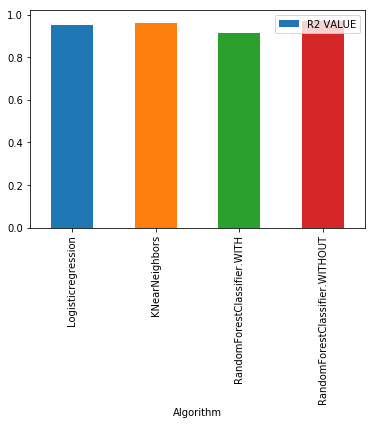

In [153]:
Accuracy.plot(kind="bar",x="Algorithm",y="R2 VALUE")
plt.show()

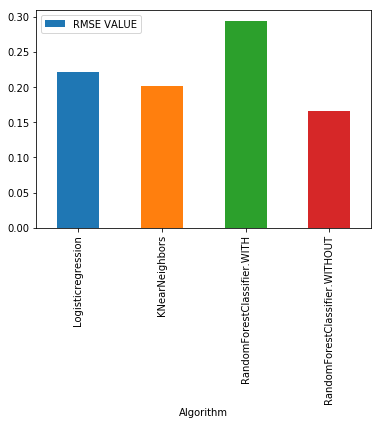

In [154]:
Accuracy.plot(kind="bar",x="Algorithm",y="RMSE VALUE")
plt.show()